# Tokyo 2020 Olympics Scraper

The purpose of this project is to scrape data from the [Tokyo 2020 Olympics](https://olympics.com/tokyo-2020/olympic-games/en/results/all-sports/medalists.htm) website using Selenium. After scraping the results, I will save the data into an Excel file that will later on be used to analyze the results of the Tokyo 2020 Olympics.

In [1]:
from selenium import webdriver
import pandas as pd

In [2]:
# Initialize Chrome
driver = webdriver.Chrome('C:\webdrivers\chromedriver.exe')

# Open Website
driver.get('https://olympics.com/tokyo-2020/olympic-games/en/results/all-sports/medalists.htm')

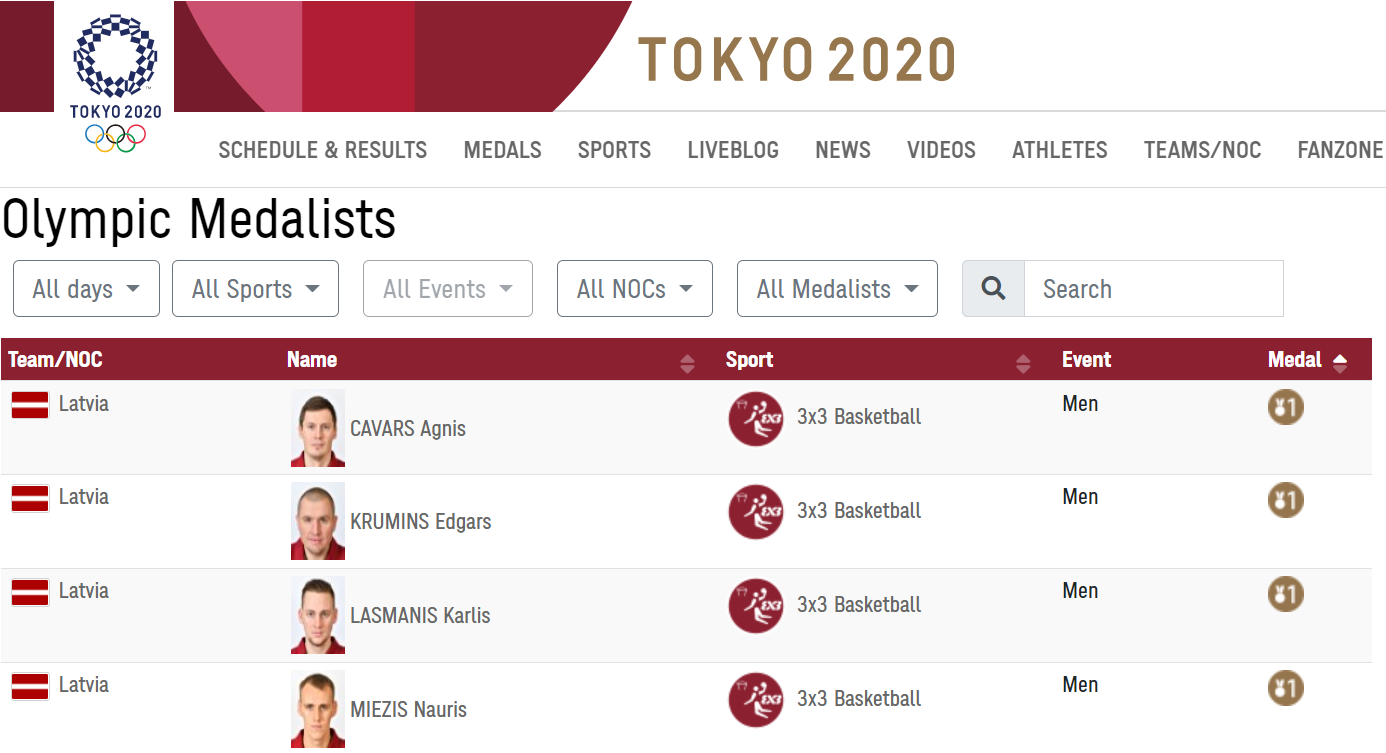

In [3]:
# Create empty list for results
olympics_results = []

In [4]:
# Loop through each page and scrape the results
for k in range(121):
    
    # Get variables using XPath
    name = driver.find_elements_by_xpath('//div[@class="playerTag"]/a/span[2]')
    country = driver.find_elements_by_xpath('//tbody/tr/td/a/div/span[1]')
    sport = driver.find_elements_by_xpath('//tbody/tr/td[3]/a')
    event = driver.find_elements_by_xpath('//tbody/tr/td[4]')
    medal = driver.find_elements_by_xpath('//tbody/tr/td[5]/img')
    
    # Load results into a dictionary
    for i in range(len(name)):
        olympics_dict={'Name': name[i].text,
                       'Country': country[i].text,
                       'Sport': sport[i].text,
                       'Event': event[i].text,
                       'Medal': medal[i].get_attribute('alt') 
        }
        olympics_results.append(olympics_dict)
    
    # Click next button to scrape next page
    next_button=driver.find_element_by_xpath('(//a[@class="page-link"])[9]')
    try:
        next_button.click()
    except:
        pass

In [5]:
# Convert list of results to a data frame
olympics_df = pd.DataFrame(olympics_results)
olympics_df

,Name,Country,Sport,Event,Medal
0,CAVARS Agnis,Latvia,3x3 Basketball,Men,Gold Medal
1,KRUMINS Edgars,Latvia,3x3 Basketball,Men,Gold Medal
2,LASMANIS Karlis,Latvia,3x3 Basketball,Men,Gold Medal
3,MIEZIS Nauris,Latvia,3x3 Basketball,Men,Gold Medal
4,DOLSON Stefanie,United States of America,3x3 Basketball,Women,Gold Medal
...,...,...,...,...,...
2396,KOLIADENKO Iryna,Ukraine,Wrestling,Women's Freestyle 62kg,Bronze Medal
2397,ZHUMANAZAROVA Meerim,Kyrgyzstan,Wrestling,Women's Freestyle 68kg,Bronze Medal
2398,CHERKASOVA Alla,Ukraine,Wrestling,Women's Freestyle 68kg,Bronze Medal
2399,ZHOU Qian,People's Republic of China,Wrestling,Women's Freestyle 76kg,Bronze Medal


In [6]:
# Save results to an Excel file
olympics_df.to_excel('2020_olympics_data.xlsx', index= False)